In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('/kaggle/input/house-price-regression-dataset/house_price_regression_dataset.csv')


In [98]:
df.head();

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [99]:
print(df.isnull().sum())


Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


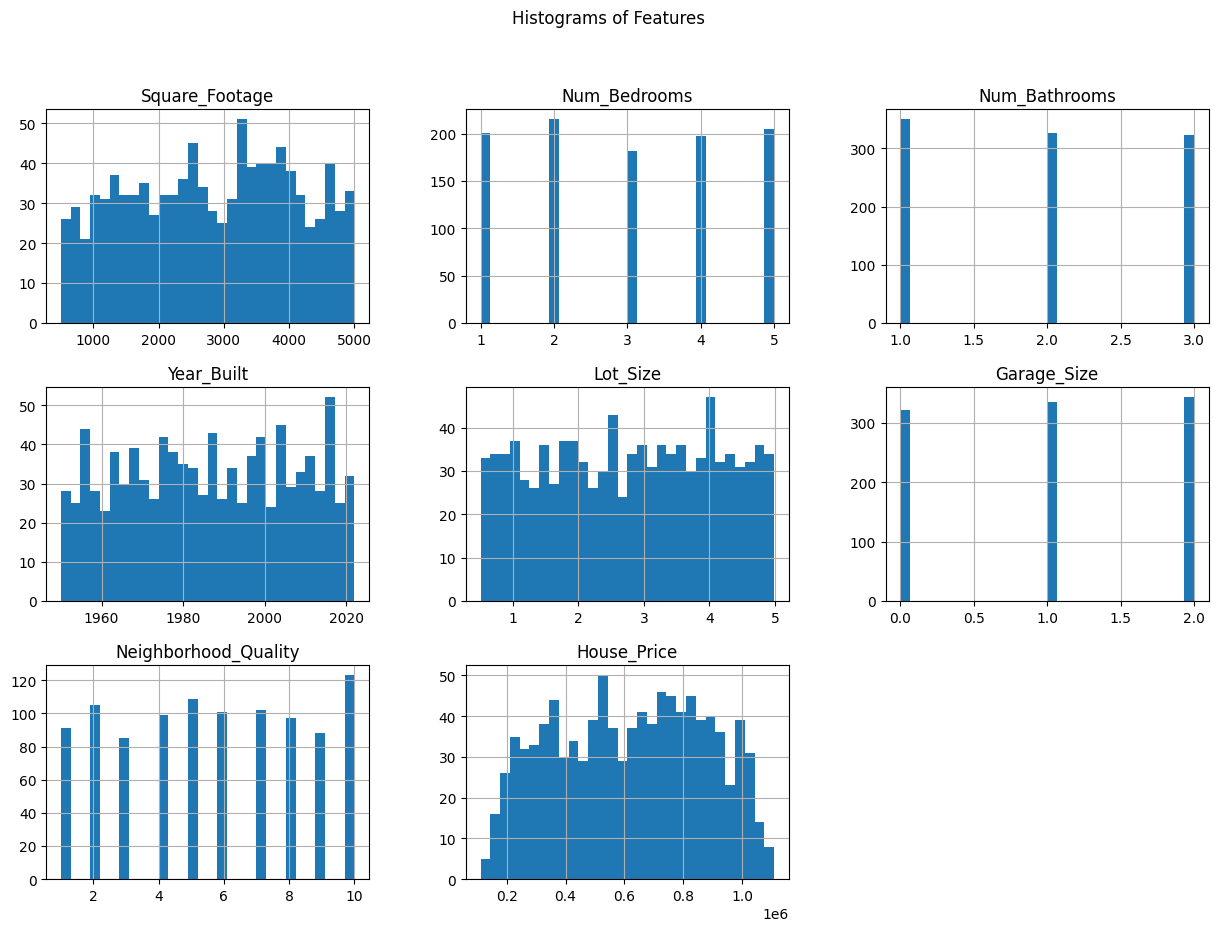

In [100]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Features")
plt.show() 

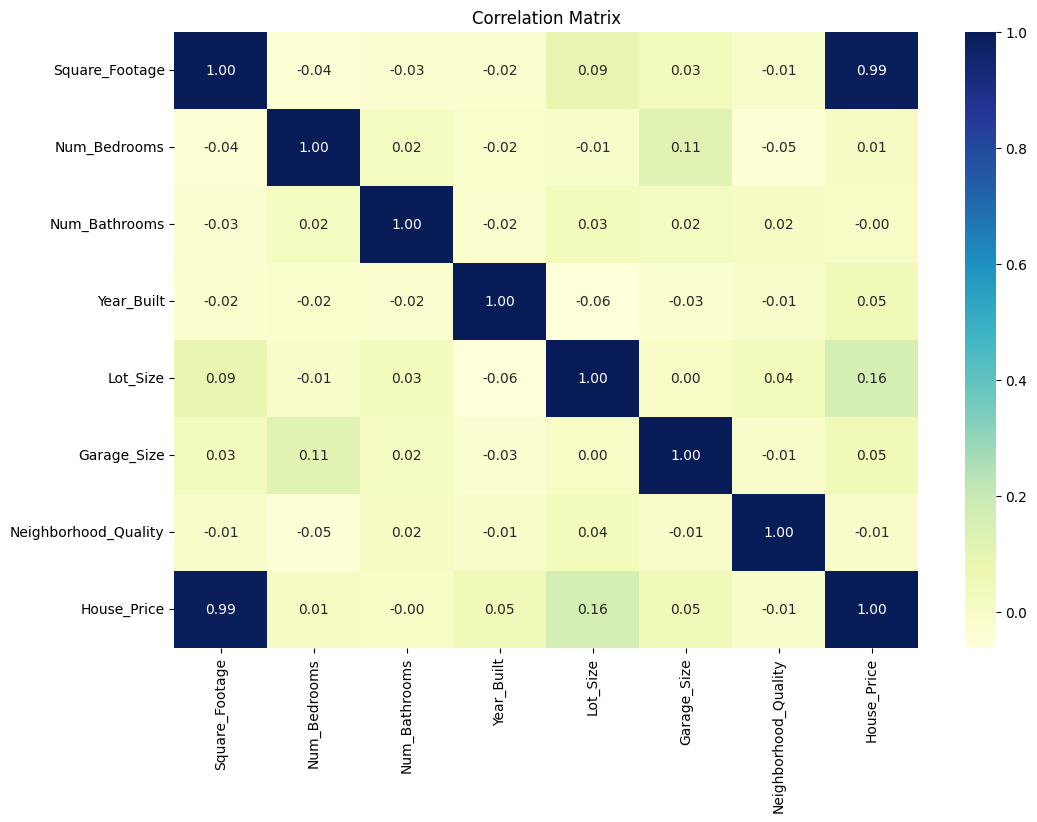

In [101]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

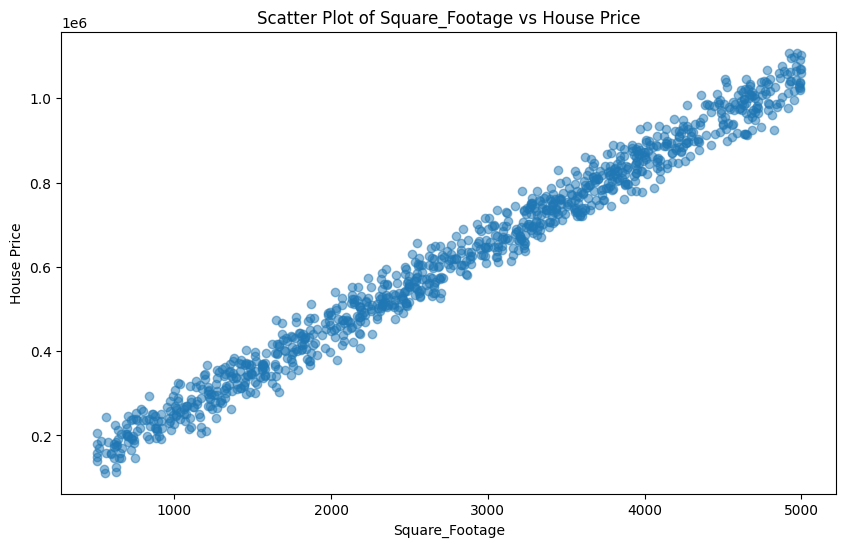

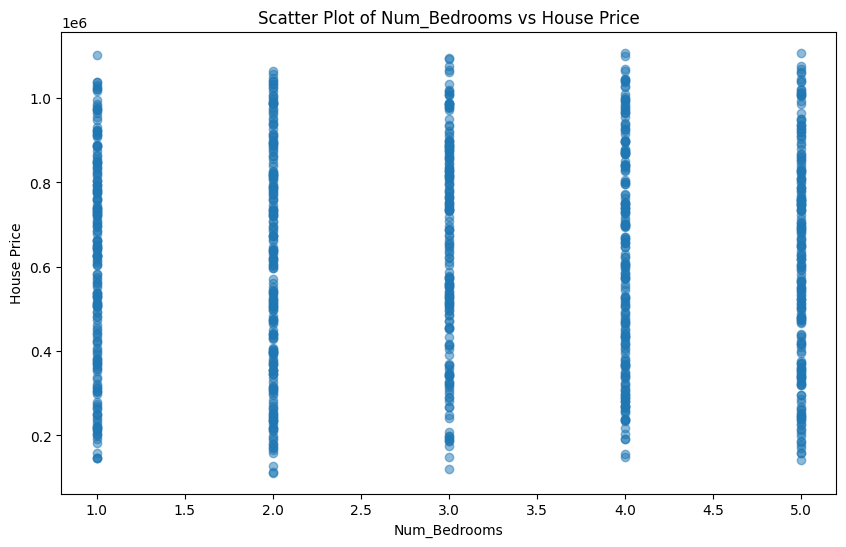

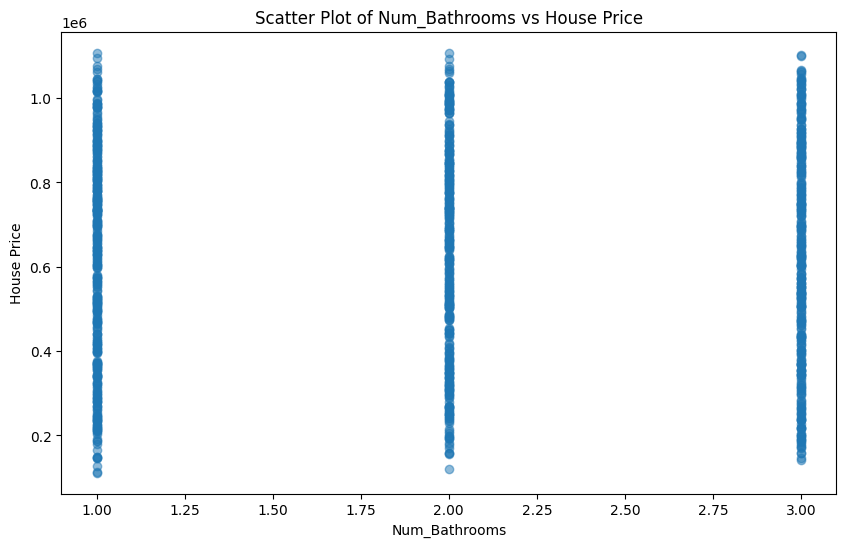

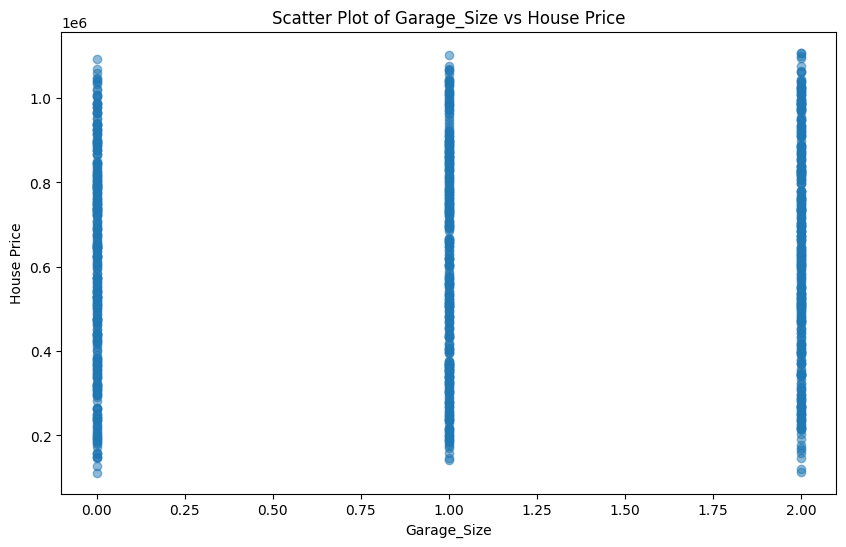

In [102]:
features_to_plot = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Garage_Size']
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df['House_Price'], alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs House Price')
    plt.xlabel(feature)
    plt.ylabel('House Price')
    plt.show() 

In [103]:
# Preprocessing
X = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Garage_Size']].values  
y = df['House_Price'].values

In [104]:
# Spltiing train-test
def train_test_split_custom(X, y, test_size=0.2):
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    split_index = int(X.shape[0] * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2)

In [105]:
def standardize_features(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    
    return X_train_scaled, X_test_scaled


X_train_scaled, X_test_scaled = standardize_features(X_train, X_test)

In [106]:
def initialize_params(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

In [107]:
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

In [108]:
def update_params(X, y, weights, bias, learning_rate):
    n_samples = X.shape[0]
    y_predicted = predict(X, weights, bias)
    
    dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
    db = (1 / n_samples) * np.sum(y_predicted - y)
    
    weights -= learning_rate * dw
    bias -= learning_rate * db
    
    return weights, bias

In [109]:
# MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [110]:
# model
def train_linear_regression(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    weights, bias = initialize_params(n_features)
    
    losses = []
    
    for i in range(n_iterations):
        weights, bias = update_params(X, y, weights, bias, learning_rate)
        
        y_predicted = predict(X, weights, bias)
        
        loss = calculate_mse(y, y_predicted)
        losses.append(loss)
        
        if (i + 1) % 100 == 0:
            print(f"Epoch {i + 1}/{n_iterations}, Loss: {loss:.4f}")
    
    return weights, bias, losses


weights, bias, losses = train_linear_regression(X_train_scaled, y_train, learning_rate=0.01, n_iterations=500)


y_pred_scratch = predict(X_test_scaled, weights, bias)

Epoch 100/500, Loss: 60373321179.3235
Epoch 200/500, Loss: 8851530577.0230
Epoch 300/500, Loss: 1920078607.7364
Epoch 400/500, Loss: 984627543.7682
Epoch 500/500, Loss: 857916795.6816


In [111]:
# Evaluation
mse_scratch = calculate_mse(y_test, y_pred_scratch)
r2_scratch = 1 - (np.sum((y_test - y_pred_scratch) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"Mean Squared Error (scratch): {mse_scratch}")
print(f"R-squared Score (scratch): {r2_scratch}")

Mean Squared Error (scratch): 877163307.3039893
R-squared Score (scratch): 0.9870668530208045


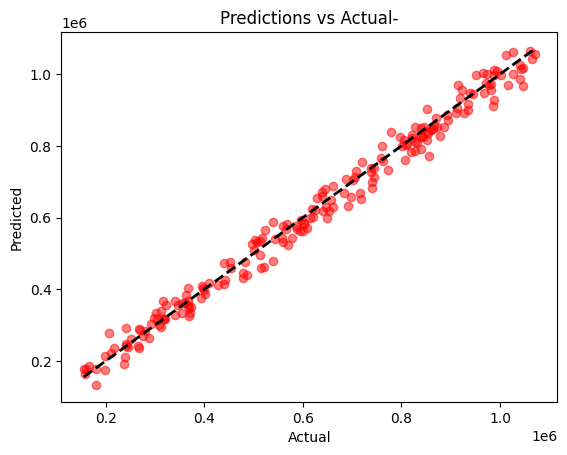

In [112]:
# Plot
plt.scatter(y_test, y_pred_scratch, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predictions vs Actual-")
plt.show()


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Mean Squared Error: 838720646.610212
R-squared Score: 0.9876336626181554


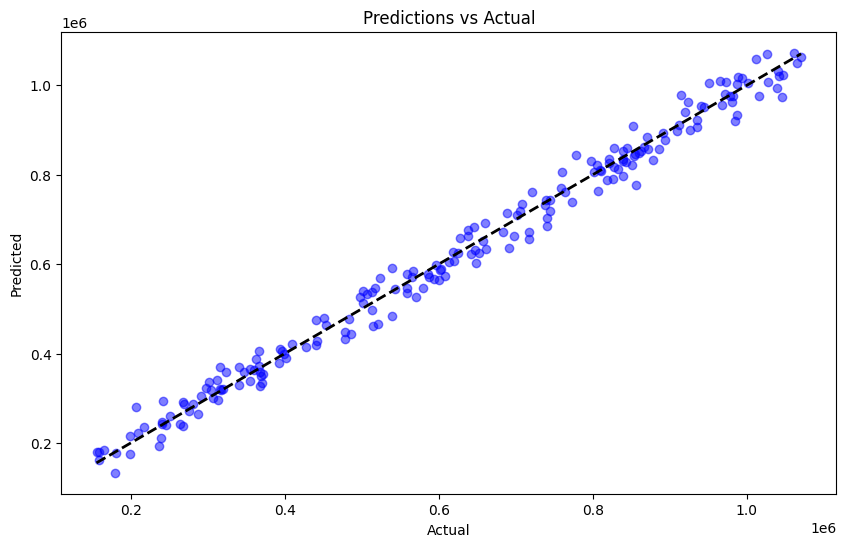

In [114]:
# Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predictions vs Actual")
plt.show()
